# Risikoauswertung der Testberechnung mit historic climate + LFK 4

Nach Besprechung mit TB am 04.04.2023 wurde eine neue Runde der 4 Varianten gestartet. Es wird nun das augenscheinlich als das zu erwartende Verhalten der Variante mittels Risikoanalysen quantifiziert.

Die Varianten sind:

|                | **sd-Wert innen zu niedrig** | **Luftpfad** |
|----------------|:----------------------------:|:------------:|
| **Variante 1** |            **-**             |              |
| **Variante 2** |                              |    **x**     |
| **Variante 3** |            **x**             |              |
| **Variante 4** |            **x**             |    **x**     |

Die betrachtete RB Kombination ist:

|                                                          | **1982-1992** | **Random - 1962-1992** |
|----------------------------------------------------------|---------------|------------------------|
| **Innenklima Trocken**                                   |               |                        |
| **Innenklima Feucht**                                    |               |                        |
| **Innenklima Büro - LFK 2**                              |               |                        |
| **Innenklima Büro -> Wohnraum - LFK2 -> LFK3 (4. Jahr)** |               |                        |
| **Innenklima Feucht - LFK 4**                            | **x**         |                        |


# Auswertung Temperatur und relative Luftfeuchtigkeit aller Varianten

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
# plt.rcParams.update({'font.size': 11})
# plt.rcParams["font.family"] = "Times New Roman"
# plt.rcParams["figure.figsize"] = (10,3)
# plt.rcParams['figure.facecolor'] = 'white'
from HAM4D_VIE_Toolbox import func_Ham4D as fHAM
import numpy as np

Einlesen der Ergebnisse:

In [4]:
# Var 1
filePath = 'results/' + 'output_var1_base_model_recFilm.txt'
listNameCells = ['Sparren_var_1', 'Sensor_var_1']
dF_Ham_var_1 = fHAM.create_result_dF(filePath, listNameCells)
# Var 2
filePath = 'results/' + 'output_var2_base_model_LPF_recFilm.txt'
listNameCells = ['Sparren_var_2', 'Sensor_var_2']
dF_Ham_var_2 = fHAM.create_result_dF(filePath, listNameCells)
# Var 3
filePath = 'results/' + 'output_var3_low_sd_recFilm.txt'
listNameCells = ['Sparren_var_3', 'Sensor_var_3']
dF_Ham_var_3 = fHAM.create_result_dF(filePath, listNameCells)
# Var 4
filePath = 'results/' + 'output_var4_low_sd_LPF_recFilm.txt'
listNameCells = ['Sparren_var_4', 'Sensor_var_4']
dF_Ham_var_4 = fHAM.create_result_dF(filePath, listNameCells)

Berechnung der Tagesmittelwerte

In [5]:
dF_Ham_var_1_days = dF_Ham_var_1.groupby(np.arange(len(dF_Ham_var_1))//24).mean()
dF_Ham_var_2_days = dF_Ham_var_2.groupby(np.arange(len(dF_Ham_var_2))//24).mean()
dF_Ham_var_3_days = dF_Ham_var_3.groupby(np.arange(len(dF_Ham_var_3))//24).mean()
dF_Ham_var_4_days = dF_Ham_var_4.groupby(np.arange(len(dF_Ham_var_4))//24).mean()

## Plot: Temperatur Var1 - Var 4

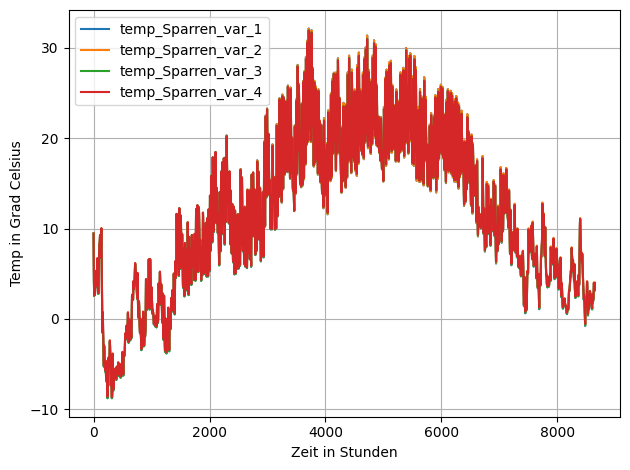

In [6]:
dF_Ham_var_1['temp_Sparren_var_1'][0:8650].plot()
dF_Ham_var_2['temp_Sparren_var_2'][0:8650].plot()
dF_Ham_var_3['temp_Sparren_var_3'][0:8650].plot()
dF_Ham_var_4['temp_Sparren_var_4'][0:8650].plot()
plt.legend()
plt.xlabel('Zeit in Stunden')
plt.ylabel('Temp in Grad Celsius')
plt.tight_layout()
plt.grid()

## Plot: Rel LF Var1 - Var 4

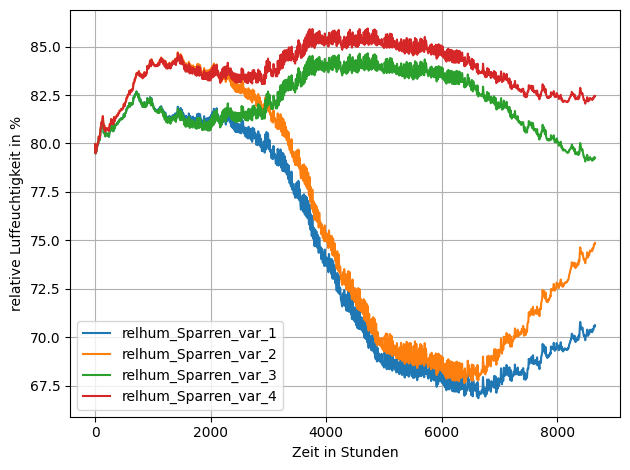

In [7]:
dF_Ham_var_1['relhum_Sparren_var_1'][0:8650].plot()
dF_Ham_var_2['relhum_Sparren_var_2'][0:8650].plot()
dF_Ham_var_3['relhum_Sparren_var_3'][0:8650].plot()
dF_Ham_var_4['relhum_Sparren_var_4'][0:8650].plot()

plt.legend()
plt.xlabel('Zeit in Stunden')
plt.ylabel('relative Luffeuchtigkeit in %')
plt.tight_layout()
plt.grid()

# Risikoanalyse

## Var 1
### Risiko - Verrottung

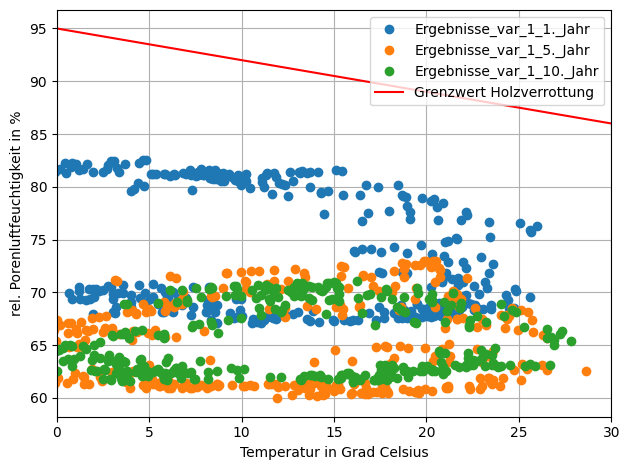

In [8]:
fHAM.rot_risk_wood(dF_Ham_var_1_days['temp_Sparren_var_1'], dF_Ham_var_1_days['relhum_Sparren_var_1'], savefig=True, plot_dir = 'plots', varname='var_1')

### Risiko - Tragfähigkeit

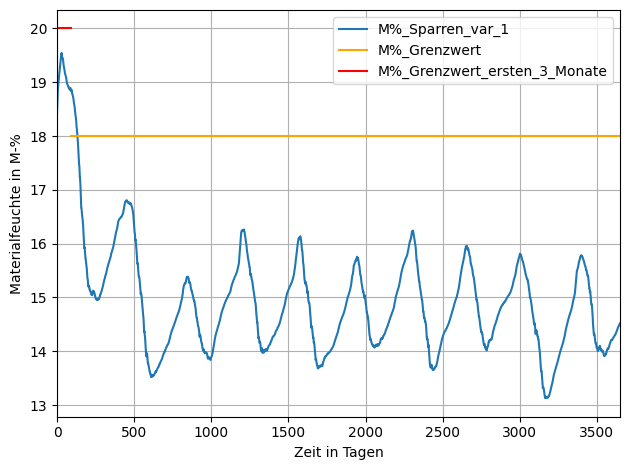

In [9]:
fHAM.struct_risk_wood(dF_Ham_var_1_days['wat_Sparren_var_1'], savefig=True, varname='var_1', plot_dir='plots')

## Var 2
### Risiko - Verrottung

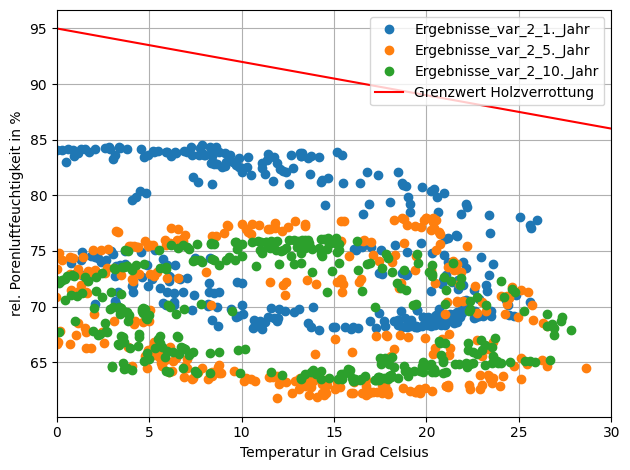

In [10]:
fHAM.rot_risk_wood(dF_Ham_var_2_days['temp_Sparren_var_2'], dF_Ham_var_2_days['relhum_Sparren_var_2'], savefig=True, plot_dir = 'plots', varname='var_2')

### Risiko - Tragfähigkeit

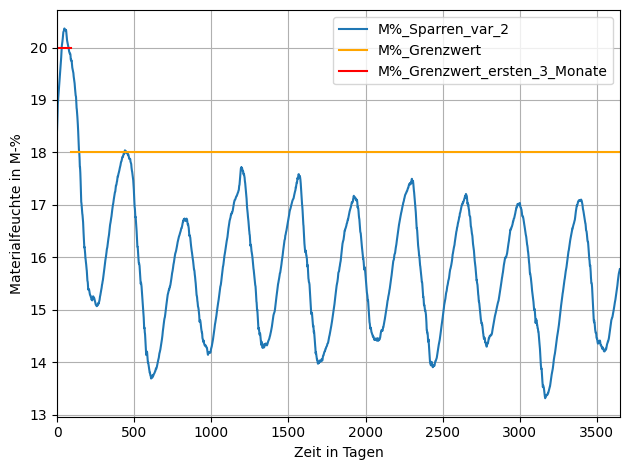

In [11]:
fHAM.struct_risk_wood(dF_Ham_var_2_days['wat_Sparren_var_2'], savefig=True, varname='var_2', plot_dir='plots')

## Var 3
### Risiko - Verrottung

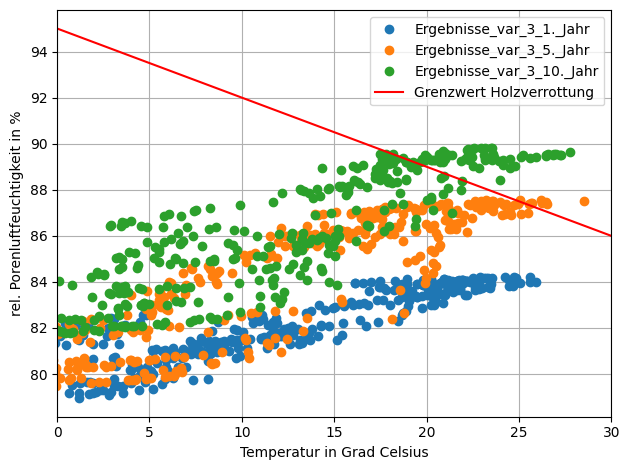

In [12]:
fHAM.rot_risk_wood(dF_Ham_var_3_days['temp_Sparren_var_3'], dF_Ham_var_3_days['relhum_Sparren_var_3'], savefig=True, plot_dir = 'plots', varname='var_3')

### Risiko - Tragfähigkeit

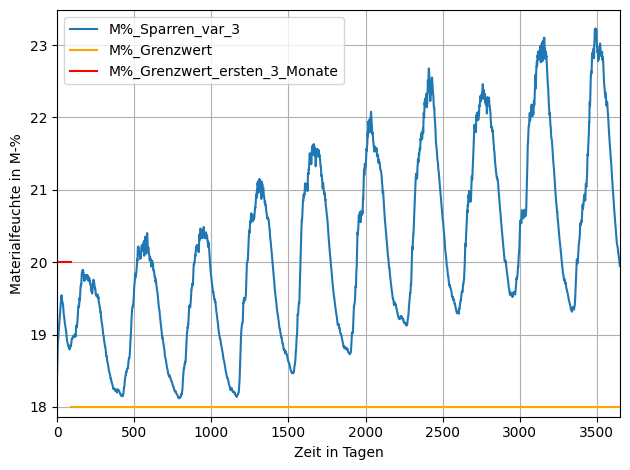

In [13]:
fHAM.struct_risk_wood(dF_Ham_var_3_days['wat_Sparren_var_3'], savefig=True, varname='var_3', plot_dir='plots')

## Var 4
### Risiko - Verrottung

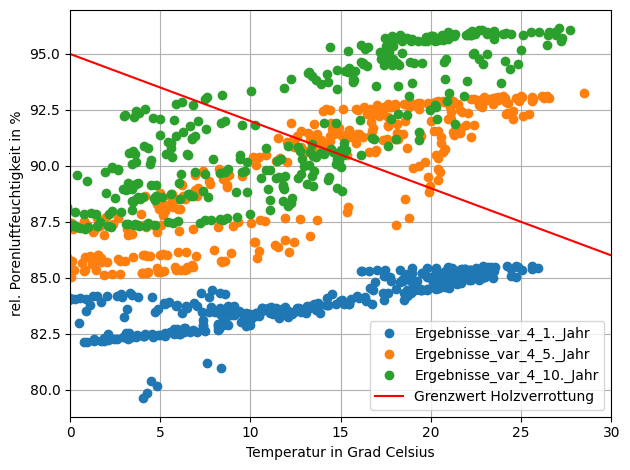

In [14]:
fHAM.rot_risk_wood(dF_Ham_var_4_days['temp_Sparren_var_4'], dF_Ham_var_4_days['relhum_Sparren_var_4'], savefig=True, plot_dir = 'plots', varname='var_4')

### Risiko - Tragfähigkeit

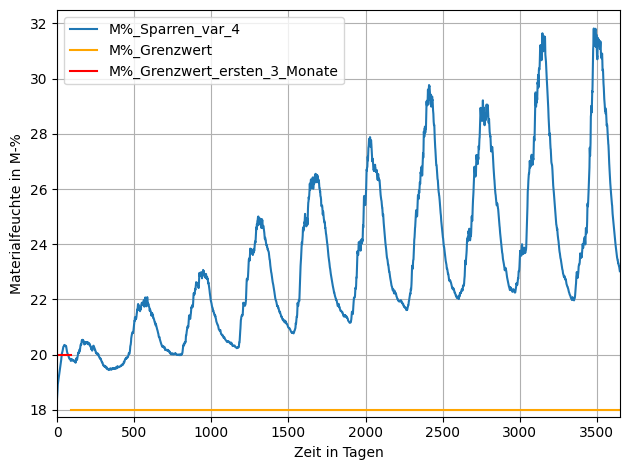

In [15]:
fHAM.struct_risk_wood(dF_Ham_var_4_days['wat_Sparren_var_4'], savefig=True, varname='var_4', plot_dir='plots')